# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Summary
## of Data Validation and Cleaning
- Validated the data based on the details provided in the Data Information Page. Missing values were identified in calories, carbohydrate, sugar, and protein columns. Filled the missing values by (1) if all 4 columns are Nan, used the median based on that category, (2) if not all 4 columns are Nan, used the median of the column instead so that it follows the overall distribution.
- Cleaned the servings column by removing the string characters and converting it to float64.
- Changed the high_traffic column to binary values (True=1, False=0).
- No rows were removed.

## of Exploratory Analysis
- The category column shows a great impact in the traffic. 
- The calories, carbohydrate, sugar, and protein columns have a high skewness, which indicates that the distribution is heavily skewed. <br>
- The four columns have identical distribution when comparing it when traffic is high and traffic is not high. This reveals that they are not contributing that much to the accuracy of the models.

## of Model Development
- Selected three models: Logistic Regression (baseline), Logistic Regression (fine-tuned) and XG Boost.
- Logistic Regression (baseline) 
- Logistic Regression (fine-tuned): transformed the features with a combination of OneHotEncoder for the categorical columns and logistic transformation and StandardScaler for the numerical ones. The adjusted features improved the performance of the model by a significant margin.
- XG Boost Model (Comparison Model) : Used hyperparameter tuning to find the best hyperparameters for the model. Uses the same features as the fine-tuned logistic regression model.

## of Model Evaluation

### Base Model

- **Accuracy**: 0.81
- **Precision**: 0.83
- **Recall**: 0.85
- **F1 Score**: 0.84

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.77      | 0.74   | 0.76     | 78      |
| **True**       | 0.83      | 0.85   | 0.84     | 112     |
| **Overall**    | 0.80      | 0.80   | 0.80     | 190     |

- **Macro Average**: Precision = 0.80, Recall = 0.80, F1 Score = 0.80
- **Weighted Average**: Precision = 0.81, Recall = 0.81, F1 Score = 0.80

### Standardized Logistic Regression

- **Accuracy**: 0.81
- **Precision**: 0.84
- **Recall**: 0.86
- **F1 Score**: 0.85

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.74      | 0.71   | 0.73     | 69      |
| **True**       | 0.84      | 0.86   | 0.85     | 121     |
| **Overall**    | 0.80      | 0.81   | 0.80     | 190     |

- **Macro Average**: Precision = 0.79, Recall = 0.78, F1 Score = 0.79
- **Weighted Average**: Precision = 0.81, Recall = 0.81, F1 Score = 0.80

### XGBoost Model (Comparison Model)

- **Accuracy**: 0.81
- **Precision**: 0.83
- **Recall**: 0.85
- **F1 Score**: 0.84

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.77      | 0.74   | 0.76     | 78      |
| **True**       | 0.83      | 0.85   | 0.84     | 112     |
| **Overall**    | 0.80      | 0.80   | 0.80     | 190     |

- **Macro Average**: Precision = 0.80, Recall = 0.80, F1 Score = 0.80
- **Weighted Average**: Precision = 0.81, Recall = 0.81, F1 Score = 0.80

All models (Base Logistic Regression, Standardized Logistic Regression, and XGBoost) achieved an accuracy of 81%, with similar performance across key metrics. The models show a strong balance between precision and recall, indicating effective identification of high-traffic recipes. The recall values are particularly noteworthy, as they highlight the models' ability to correctly identify most high-traffic recipes, which is crucial for maximizing traffic and potential subscriptions.

## Best Model Recommendation:
Standardized Logistic Regression (fine-tuned) is recommended based on the following reasons:

### Higher Precision and Recall:

It has the highest precision (0.84) and recall (0.86) among the models, which suggests it is better at identifying true positives and is less likely to miss high-traffic recipes.
### Balanced Performance:

The F1 Score of 0.85 is the highest among the models, indicating a good balance between precision and recall, which is crucial for effectively identifying popular recipes.
### Feature Transformation:

The use of feature scaling and one-hot encoding has improved its performance, which may lead to better generalization on unseen data.

<br>
<br>
<br>
## of Business Metrics

Despite having a slightly lower accuracy (76%) than the goal (80%), given the time constraint and the amount of data available, the model's performance is indeed acceptable. The model's performance has high recall, making it a good candidate for identifying popular recipes.

## Recommendations

- **Predicting High-Traffic Recipes**:
  - Both models are capable of predicting which recipes will likely lead to high traffic. The logistic regression model, in particular, shows a high recall rate, making it effective for this purpose.

- **Accuracy Target**:
  - The models do not meet the 80% accuracy target but are still valuable due to their high recall. This suggests they are effective at identifying popular recipes, which is essential for increasing website traffic.

- **Next Steps**:
  - **Model Utilization**: Implement either the logistic regression or XGBoost model for guiding recipe selection on the homepage. The high recall rates suggest that these models will help in identifying popular recipes and boosting website traffic.
  - **Continuous Improvement**: To achieve the 80% accuracy goal, consider further refining the models through additional feature engineering, hyperparameter tuning, or incorporating more data.
  - **A/B Testing**: Conduct A/B tests using the model's predictions to compare the impact on traffic and refine the models based on real-world performance.
  - ** Gather more data**: Collect more data on the recipes, as well as other features that could be relevant for predicting high traffic. This could help improve the model's accuracy and overall performance.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read the data
url = "recipe_site_traffic_2212.csv"
df = pd.read_csv(url)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Data Validation and Cleaning
## Summary:
The first step is to understand the structure of the data and identify any issues. Let's start by checking the dimensions, data types, and missing values. <br>
In printing the first few rows, we can see that there are 8 columns: recipe, calories, carbohydrate, sugar, protein, category, servings, and high_traffic. <br>
We can also see that there are missing values in some columns. <br>
Since high_traffic column only keeps track of "High" and Nan values, we treat NaN values as those that are not high traffic.

The data type of the columns should be:
- recipe: object or int64 (this is already a unique identifier) 
- calories, carbohydrate, sugar, protein, servings: float64
- category: object (string category)
- high_traffic: boolean

Step for cleaning and validating the columns:
- drop the recipe column because it's a unique identifier and not relevant for the analysis.
- Check for Inconsistencies in the numerical columns. Cleaned the servings column by removing the string characters and converting it to float64.
- handle missing values in the calories, carbohydrate, sugar, protein, and servings columns. Check the skewness to decide on an appropriate method (imputation using median).
- convert high_traffic to a numerical column (True -> 1, False -> 0)
- Check for any inconsistencies in the category column (e.g., lowercase or uppercase).

Removing data:
- There is no need to drop data in this case since we will try to make a model that only focuses between category and high_traffic.

![column_desc](column_desc.png)

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [3]:
#check number of unique values
df.nunique()

# we can see that recipe has 947 values, indicating that there are no duplicate recipes.

recipe          947
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64

In [4]:
# However, we can see that there are duplicates in the other columns. Note that the "recipe" column is the name of the recipe and cannot be duplicated. The process in the cooking might be different, having different recipe number for the same recipe.
df.drop("recipe",axis=1).duplicated().sum()

23

In [5]:
# checking servings
print(df.servings.value_counts())
print("Let's clean the servings column by removing the strings and converting them to numbers.")
print("Here, we can just use subsetting the first character to check if it's a digit, and if so, convert it to a number.")
df['servings'] = df['servings'].str.extract(r'(\d+)').astype(int)
df.servings.value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64
Let's clean the servings column by removing the strings and converting them to numbers.
Here, we can just use subsetting the first character to check if it's a digit, and if so, convert it to a number.


servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

# Exploratory Analysis
In order to clean the data, we need to check the distribution of the variables, look for outliers, and identify any patterns. This will help us identify what statistical measures to use and whether any preprocessing is needed.

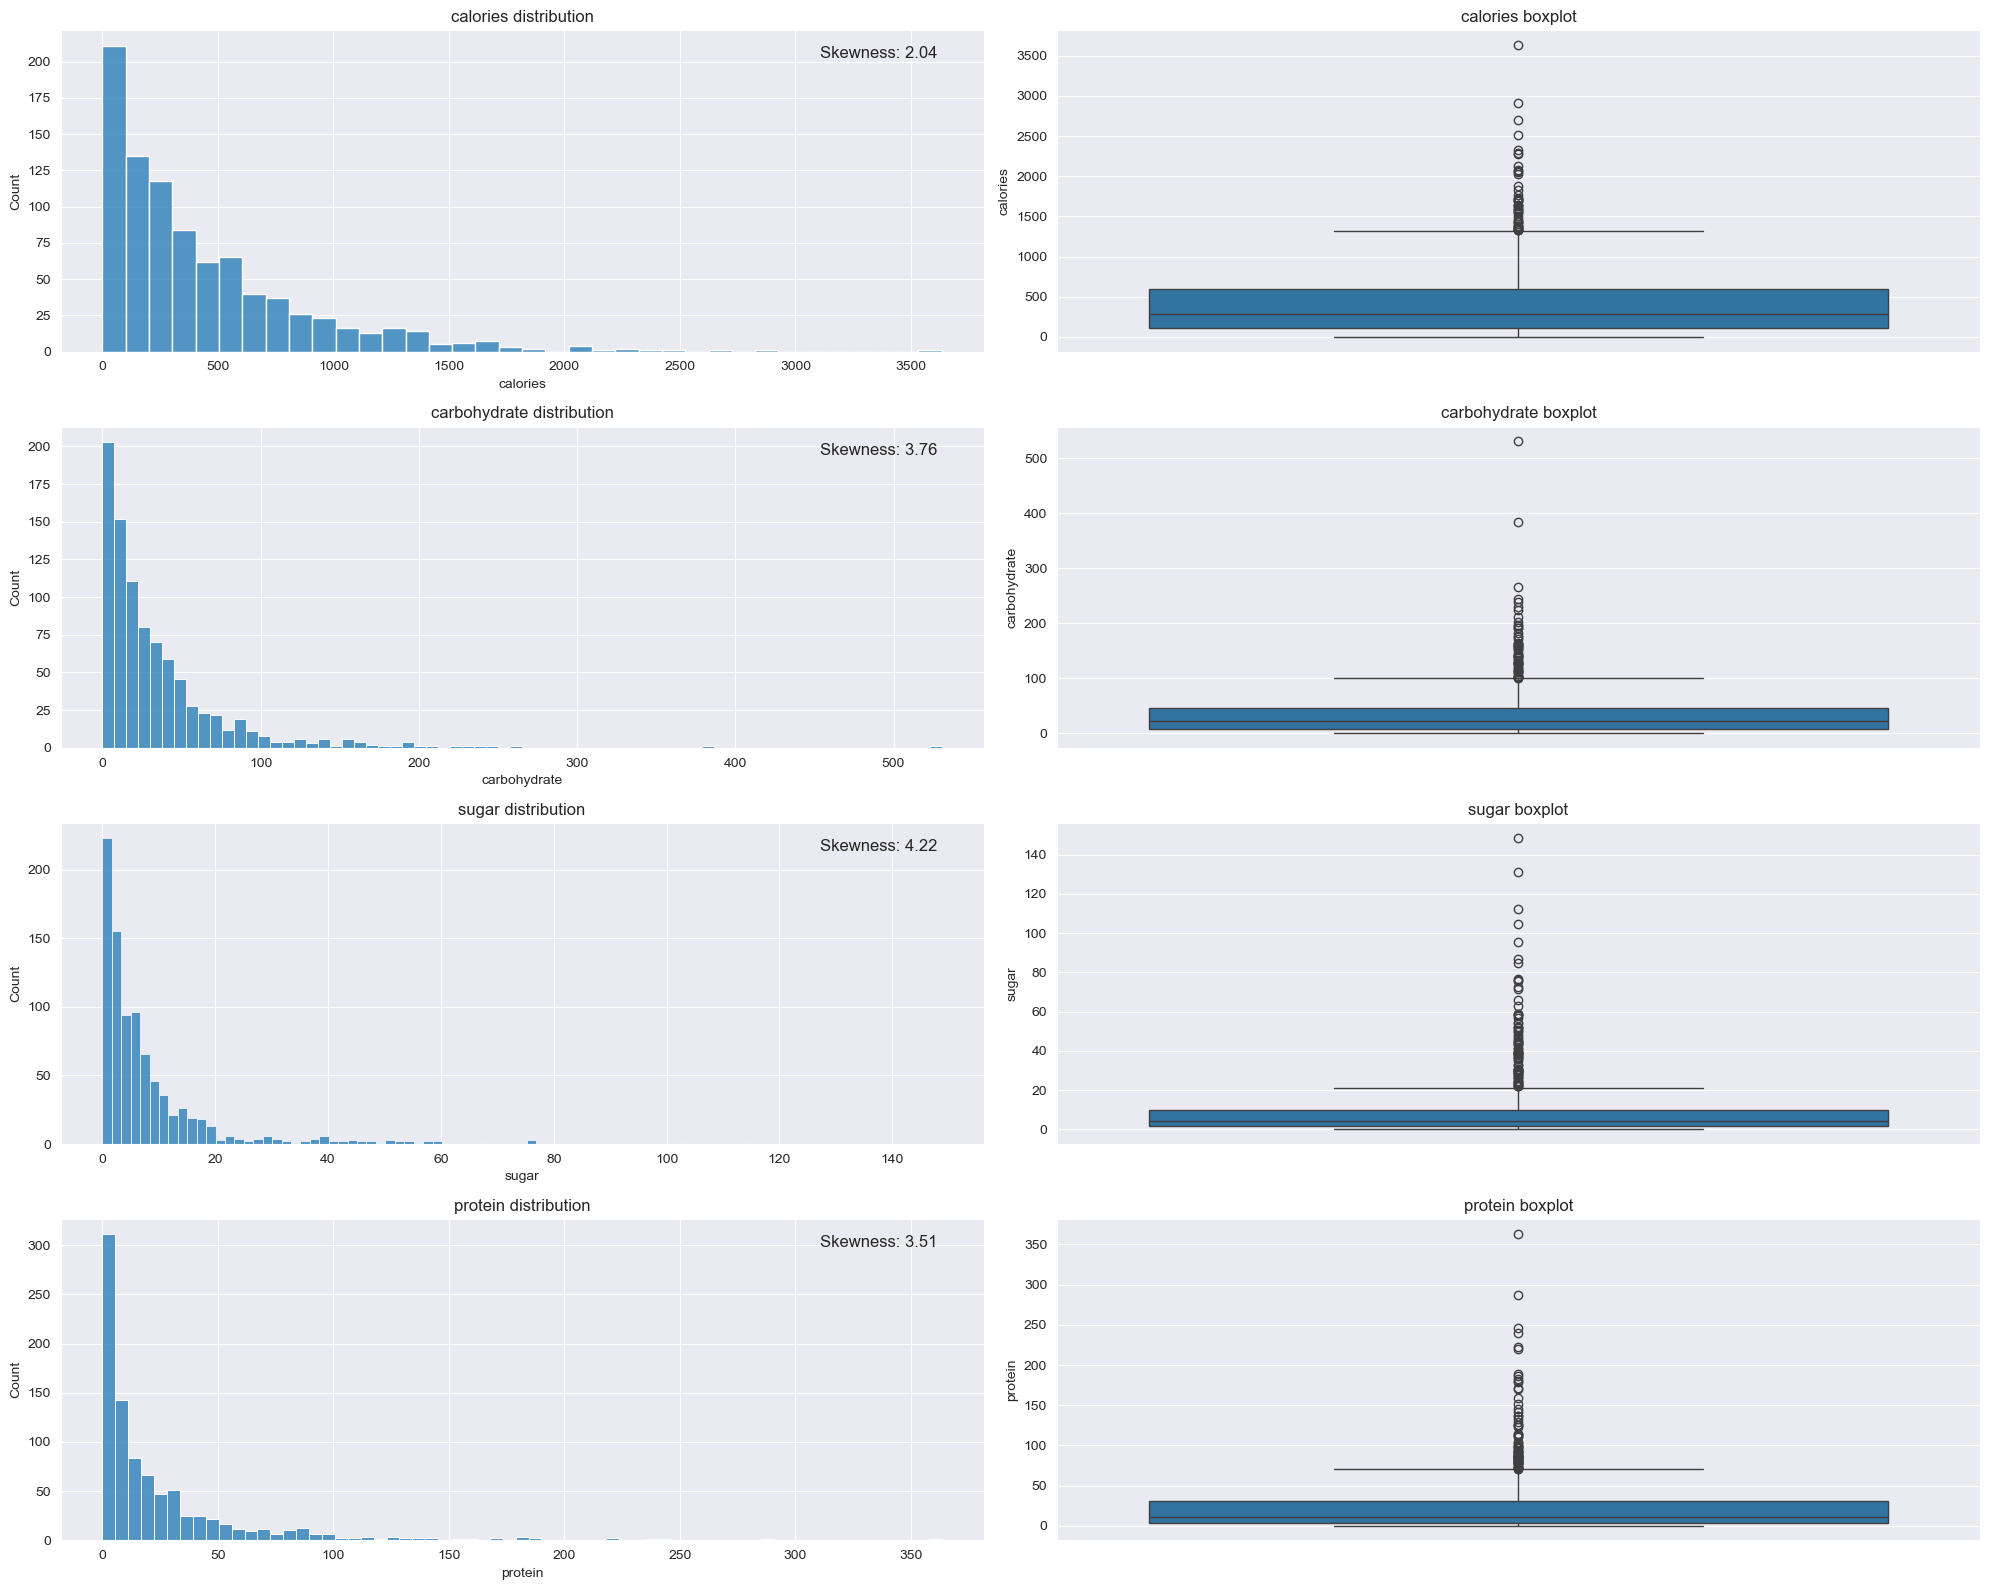

In [6]:
def plot_continuous_variables(df, variables):
    fig, ax = plt.subplots(len(variables), 2, figsize=(20, 4 * len(variables)))
    for i, var in enumerate(variables):
        sns.histplot(df[var], ax=ax[i, 0])
        ax[i, 0].set_title(f'{var} distribution')
        sns.boxplot(df[var], ax=ax[i, 1])
        ax[i, 1].set_title(f'{var} boxplot')
        # annotate skewness
        skewness = df[var].skew()
        ax[i, 0].text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=ax[i, 0].transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12)
    plt.tight_layout()
    plt.show()

# plot continuous variables
continuous_variables = ['calories', 'carbohydrate', 'sugar', 'protein']
plot_continuous_variables(df, continuous_variables)

## Skewness of the continuous variables
We can see that "calories", "carbohydrate", "sugar", and "protein" columns are right skewed. We can use median imputation for the missing values. <br>
For rows that have missing values in the 4 columns, we'll use the mean value of the category where the row belongs to.

In [7]:
pivot = df.pivot_table(index='category', values=['calories', 'carbohydrate', 'sugar', 'protein'], aggfunc=['median', 'mean'])
print(pivot)

                 median                                     mean               \
               calories carbohydrate protein   sugar    calories carbohydrate   
category                                                                        
Beverages       126.455       11.250   0.410   8.075  177.732174    15.955978   
Breakfast       229.380       28.420  11.685   4.830  331.880000    39.711698   
Chicken         379.870       18.110  32.980   3.170  566.732029    30.751304   
Chicken Breast  371.335       13.475  37.770   3.645  540.338511    21.833191   
Dessert         288.550       38.550   4.810  24.650  351.402078    55.661818   
Lunch/Snacks    369.505       31.985  12.965   2.750  478.848537    42.820976   
Meat            460.870       19.115  28.530   3.385  584.533784    22.159595   
One Dish Meal   419.280       25.430  28.480   4.040  579.090000    50.383433   
Pork            399.260       19.560  29.820   5.230  629.708082    28.076164   
Potato          269.460     

In [8]:
for row in df.iterrows():
    if pd.isna(row[1].calories) and pd.isna(row[1].carbohydrate) and pd.isna(row[1].sugar) and pd.isna(row[1].protein):
        category = row[1].category
        df.loc[row[0], 'calories'] = pivot.loc[category,'median']['calories']
        df.loc[row[0], 'carbohydrate'] = pivot.loc[category,'median']['carbohydrate']
        df.loc[row[0],'sugar'] = pivot.loc[category,'median']['sugar']
        df.loc[row[0], 'protein'] = pivot.loc[category,'median']['protein']

In [9]:
from sklearn.impute import SimpleImputer
def fill_missing_values(df, columns, method='median'):
    for col in columns:
        imputer = SimpleImputer(strategy=method)
        df[col] = imputer.fit_transform(df[[col]])
        print(f'Imputed missing values in {col} using {method} with median value of {df[col].median()}')
        del imputer
fill_missing_values(df, ['calories', 'carbohydrate', 'sugar', 'protein'])

Imputed missing values in calories using median with median value of 296.92
Imputed missing values in carbohydrate using median with median value of 21.19
Imputed missing values in sugar using median with median value of 4.4
Imputed missing values in protein using median with median value of 11.24


<Axes: xlabel='category'>

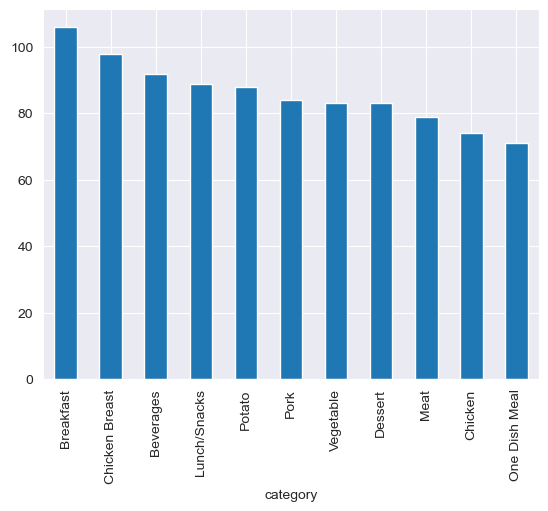

In [10]:
df.category.value_counts().plot(kind='bar')

In [11]:
df['high_traffic'] = df['high_traffic'] == "High"
df.high_traffic

0       True
1       True
2      False
3       True
4      False
       ...  
942    False
943     True
944     True
945     True
946    False
Name: high_traffic, Length: 947, dtype: bool

# Summary of Exploratory Analysis
## Distribution Similarity
**Observation**: The distributions of numerical variables (ie calories, carbohydrate, and protein) appear similar between the two categories of the high_traffic target variable (true vs. false). <br>
**Implication**: This similarity suggests that these variables may not show significant differences across the target variable categories and, therefore, might not be effective in distinguishing between the two classes.
## Correlation with high_traffic:

**calories**: Slight positive correlation (0.066316), indicating a weak tendency for higher calories to be associated with high_traffic. <br>
**carbohydrate**: Slight positive correlation (0.075117), suggesting a weak positive relationship. <br>
**sugar**: Slight negative correlation (-0.074293), indicating a weak negative relationship. <br>
**protein**: Slight positive correlation (0.036912), showing a minimal positive relationship. <br>
**servings**: Slight positive correlation (0.048708), indicating a weak positive relationship. <br>
## Model Development Considerations
**Feature Importance**: Variables with similar distributions between categories may contribute less to predictive modeling. They might not improve the model's ability to predict the high_traffic target variable. Also,  since the correlations between the numerical variables and high_traffic are relatively weak, these features may not significantly contribute to distinguishing between high_traffic categories. <br>
**Feature Engineering**: Consider exploring additional features or engineering new ones that exhibit more distinct patterns across the target variable categories.

## Using RandomForestClassifier to check feature importance
The result shows that the category column shows the most importance in predicting the high_traffic column. This is consistent with the observation that the category column has a significant impact on the traffic. This is also backed up by the correlation matrix of the numerical variables and high_traffic.


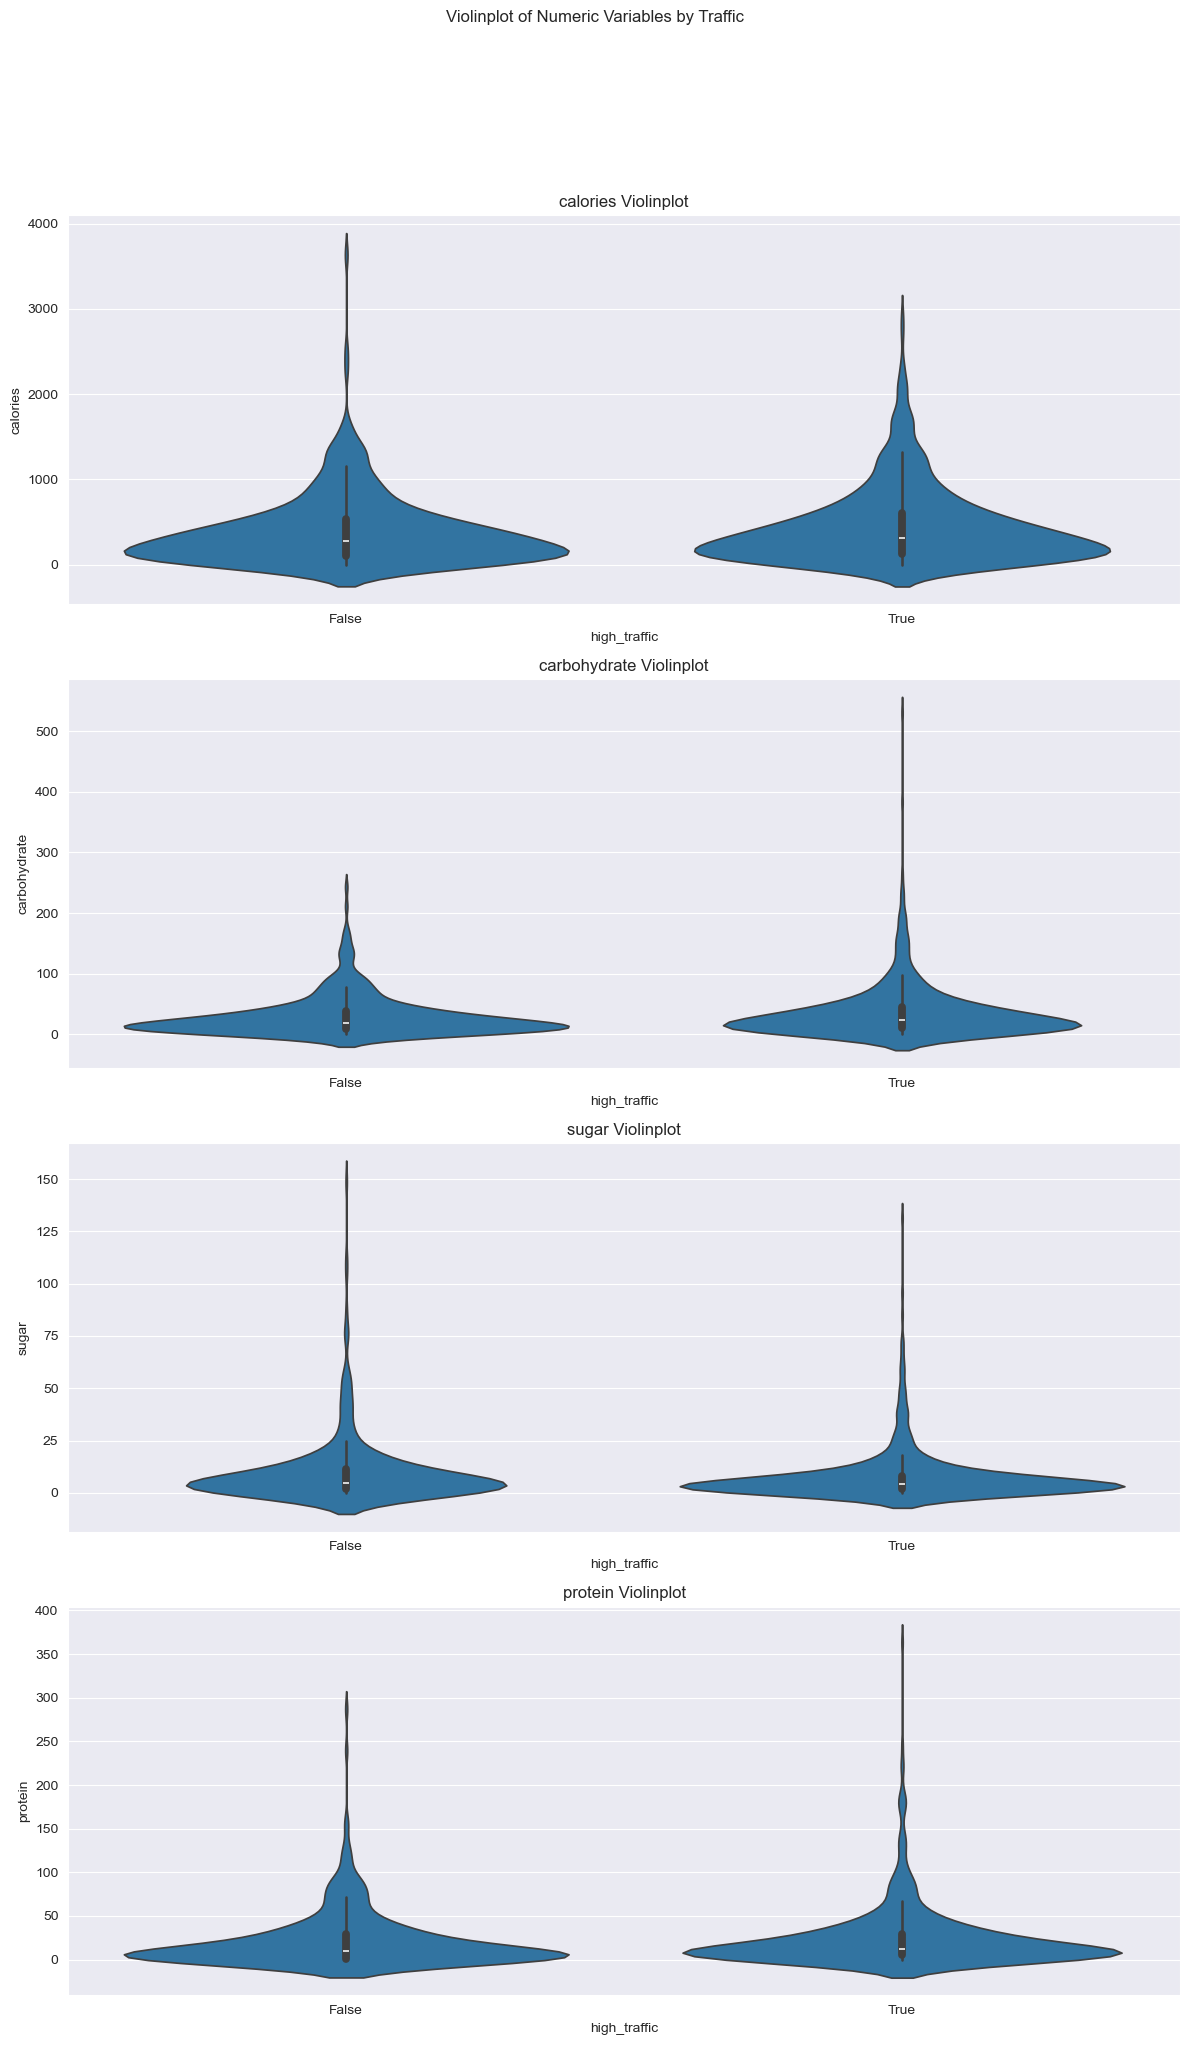

In [87]:
def plot_numeric_variables_boxplot(df, variables):
    fig, ax = plt.subplots(len(variables), 1, figsize=(12, 5 * len(variables)))

    for i, var in enumerate(variables):
        sns.violinplot(y=df[var], x=df["high_traffic"], ax=ax[i])
        ax[i].set_title(f'{var} Violinplot')

    plt.suptitle('Violinplot of Numeric Variables by Traffic', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()

plot_numeric_variables_boxplot(df, ['calories', 'carbohydrate', 'sugar', 'protein'])



<Axes: >

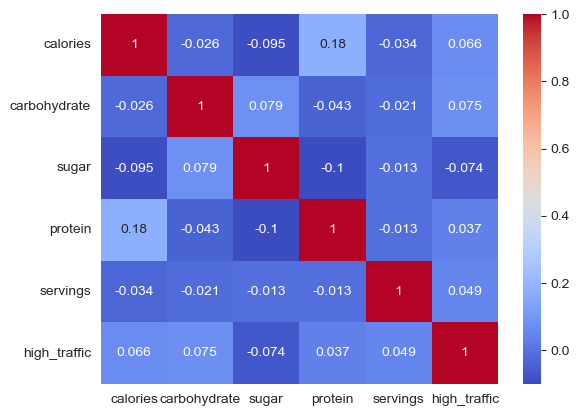

In [15]:
import seaborn as sns
corrcoeff = df.drop(["recipe", "category"], axis = 1).corr()
sns.heatmap(corrcoeff, annot=True, cmap='coolwarm')

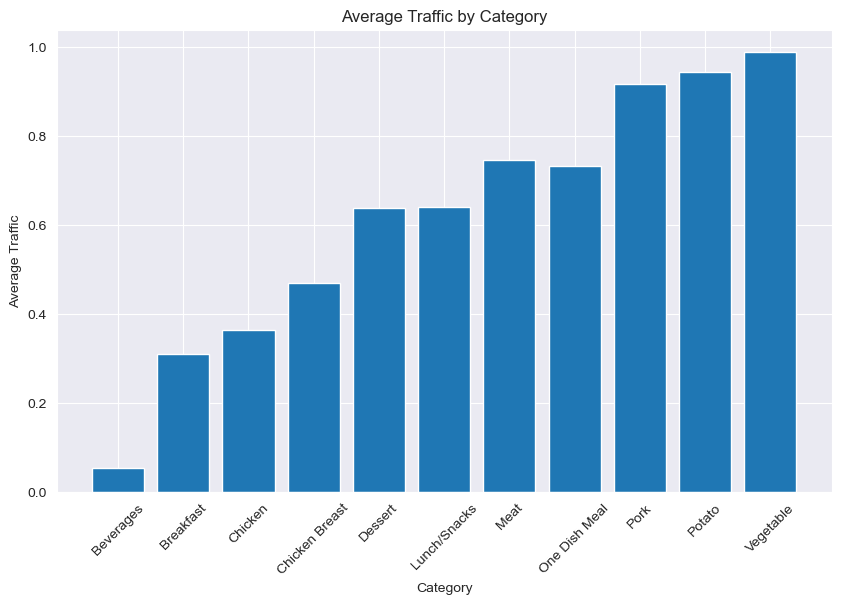

In [79]:

# Group by category and calculate the mean traffic
category_traffic = df.groupby('category')['high_traffic'].mean().reset_index()

# Plot the traffic based on category
plt.figure(figsize=(10, 6))
plt.bar(category_traffic['category'], category_traffic['high_traffic'])
plt.xlabel('Category')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Category')
plt.xticks(rotation=45)
plt.show()

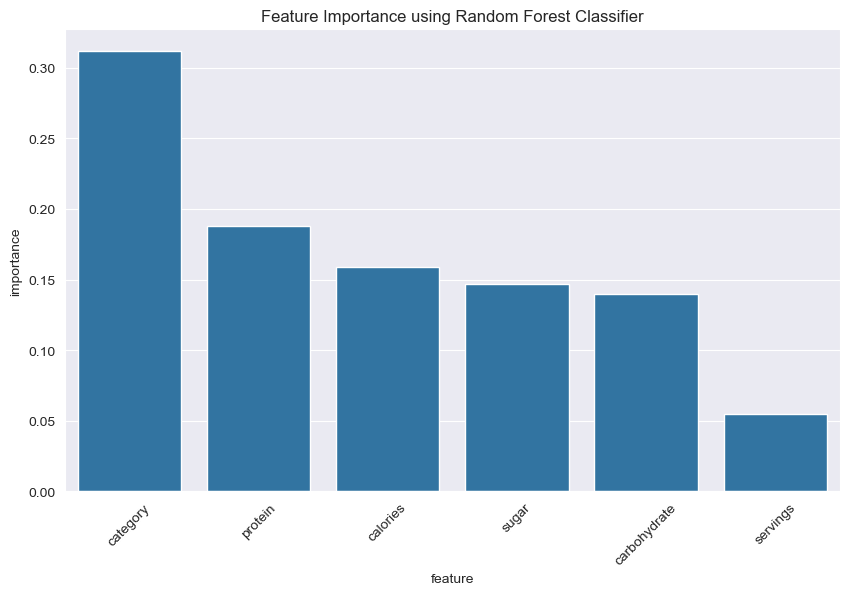

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#encoding the categorical variables
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

rf  = RandomForestClassifier()
X = df.drop(['high_traffic', 'recipe'], axis=1)
y = df['high_traffic']
rf.fit(X, y)
importances = rf.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)

#plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='importance', data=importances_df)
plt.xticks(rotation=45)
plt.title('Feature Importance using Random Forest Classifier')
plt.show()

## Building the Model
The picture below shows the top supervised learning models. For this problem, the target variable 'high_traffic' is binary, so a suitable model for this problem would be Logistic Regression and XGBoost.
We have three models:
1. Logistic Regression: A baseline model
2. Logistic Regression with Standardization: To standardize the numerical features to improve model performance.
3. XGBoost: A powerful model with good performance and computational efficiency.

### Logistic Regression : Baseline Model
- Uses the features : category (One-Hot Encoded) and servings.
### Logistic Regression with Standardization : Standardizes the numerical features to improve model performance.
- Uses the features : category (One-Hot Encoded) and all the numerical features -> logarithmical transformations for numerical features -> Standardization using StandardScaler.

### XGBoost
- Uses the same features as Logistic Regression with Standardization.
- Used Hyperparameter tuning to find the best hyperparameters.

![models](Models.png)

In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
# create feature matrix and target vector
X = df.drop(['high_traffic', 'recipe'], axis=1)
y = df['high_traffic']
# encode categorical variables
categorical_columns = ['category']
encoder = OneHotEncoder()
X_cat = pd.get_dummies(X[categorical_columns], drop_first=True)

In [130]:
# Assuming X and y are defined elsewhere
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
scaler = StandardScaler()

# Copy and transform numerical data
X_numeric = X[numerical_columns].copy()
X_numeric = np.log1p(X_numeric)  # Apply log1p transformation
X_numeric = scaler.fit_transform(X_numeric)  # Standardize

# Convert the scaled NumPy array back to a DataFrame
X_numeric = pd.DataFrame(X_numeric, columns=numerical_columns)

X_scaled = pd.concat([X_numeric, X_cat.reset_index(drop=True)], axis=1)



In [140]:
#base model
log_reg_cat_serve = LogisticRegression()
X_cat_serve = pd.concat([X_numeric[['servings']], X_cat], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_cat_serve, y, test_size=0.2, random_state=60)
log_reg_cat_serve.fit(X_train, y_train)

y_pred = log_reg_cat_serve.predict(X_test)
print("Results for Base Model:\n")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}, Precision: {precision_score(y_test, y_pred):.2f}, Recall: {recall_score(y_test, y_pred):.2f}, F1 Score: {f1_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))


Results for Base Model:

Accuracy: 0.81, Precision: 0.85, Recall: 0.84, F1 Score: 0.85
              precision    recall  f1-score   support

       False       0.74      0.76      0.75        71
        True       0.85      0.84      0.85       119

    accuracy                           0.81       190
   macro avg       0.80      0.80      0.80       190
weighted avg       0.81      0.81      0.81       190



In [139]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 21)

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression(C = 1, penalty='l2', solver='liblinear')
logistic_regression.fit(X_train, y_train)


# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Results for Standardized Logistic Regression:\n")
print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Results for Standardized Logistic Regression:

Accuracy: 0.82, Precision: 0.82, Recall: 0.88, F1 Score: 0.85
              precision    recall  f1-score   support

       False       0.80      0.73      0.77        78
        True       0.82      0.88      0.85       112

    accuracy                           0.82       190
   macro avg       0.81      0.80      0.81       190
weighted avg       0.82      0.82      0.81       190



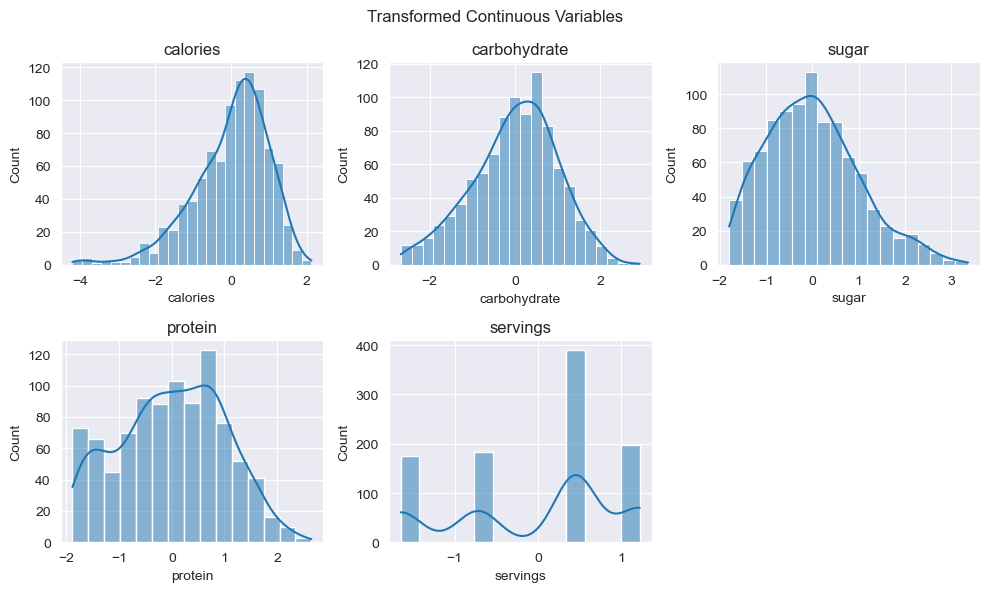

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot histograms with KDE using seaborn
for column in ["calories", "carbohydrate", "sugar", "protein", "servings"]:
    plt.subplot(2, 3, ["calories", "carbohydrate", "sugar", "protein", "servings"].index(column) + 1)
    sns.histplot(X_scaled[column], kde=True)
    plt.title(column)

plt.suptitle("Transformed Continuous Variables")
plt.tight_layout()
plt.show()

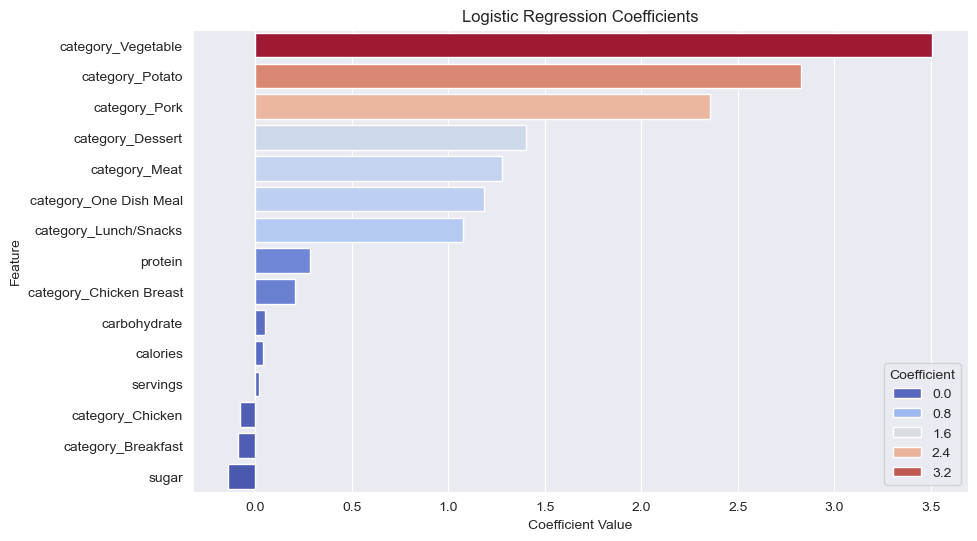

In [125]:

log_coef = pd.DataFrame(logistic_regression.coef_.flatten(), columns=['Coefficient'], index=X_scaled.columns)

# Sort coefficients from highest to lowest
log_coef_sorted = log_coef.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=log_coef_sorted.index, x=log_coef_sorted['Coefficient'], orient='h', palette='coolwarm', hue = log_coef_sorted['Coefficient'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
#!pip install xgboost

In [169]:
#use XGBoost as a comparison model
from xgboost import XGBClassifier

# define the model
xgboost_model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)

In [170]:
from sklearn.model_selection import GridSearchCV
# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
   'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 1],
}

# define the grid search model
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=5)

# fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [171]:
y_pred = grid_search.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Results for XGBoost Model (Comparison Model):\n")
print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Results for XGBoost Model (Comparison Model):

Accuracy: 0.79, Precision: 0.82, Recall: 0.86, F1 Score: 0.84
              precision    recall  f1-score   support

       False       0.73      0.67      0.70        70
        True       0.82      0.86      0.84       120

    accuracy                           0.79       190
   macro avg       0.78      0.76      0.77       190
weighted avg       0.79      0.79      0.79       190



## Summary of Model Evaluation

### Base Model

- **Accuracy**: 0.81
- **Precision**: 0.85
- **Recall**: 0.84
- **F1 Score**: 0.85

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.74      | 0.76   | 0.75     | 71      |
| **True**       | 0.85      | 0.84   | 0.85     | 119     |
| **Overall**    | 0.81      | 0.80   | 0.81     | 190     |

- **Macro Average**: Precision = 0.80, Recall = 0.80, F1 Score = 0.80
- **Weighted Average**: Precision = 0.81, Recall = 0.81, F1 Score = 0.81

### Standardized Logistic Regression

- **Accuracy**: 0.82
- **Precision**: 0.82
- **Recall**: 0.88
- **F1 Score**: 0.85

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.80      | 0.73   | 0.77     | 78      |
| **True**       | 0.82      | 0.88   | 0.85     | 112     |
| **Overall**    | 0.82      | 0.82   | 0.81     | 190     |

- **Macro Average**: Precision = 0.81, Recall = 0.80, F1 Score = 0.81
- **Weighted Average**: Precision = 0.82, Recall = 0.82, F1 Score = 0.81

### XGBoost Model (Comparison Model)

- **Accuracy**: 0.79
- **Precision**: 0.82
- **Recall**: 0.86
- **F1 Score**: 0.84

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.73      | 0.67   | 0.70     | 70      |
| **True**       | 0.82      | 0.86   | 0.84     | 120     |
| **Overall**    | 0.79      | 0.76   | 0.77     | 190     |

- **Macro Average**: Precision = 0.78, Recall = 0.76, F1 Score = 0.77
- **Weighted Average**: Precision = 0.79, Recall = 0.79, F1 Score = 0.79

## Best Model Recommendation:

### Standardized Logistic Regression

Based on the evaluation metrics, Standardized Logistic Regression is recommended for the following reasons:

- **Accuracy** : Measures the percentage of correctly predicted recipes. Higher accuracy means the model is generally good at predicting both popular and non-popular recipes. It has a good accuracy of 0.82, reaching the target of 80%.
- **Higher Precision and Recall**: It has the highest recall (0.88) among the models, indicating it is effective at identifying true positives. The precision is slightly lower than the Base Model but still robust.
- **Balanced Performance**: The F1 Score of 0.85 is on par with the Base Model, providing a good balance between precision and recall.
- **Feature Transformation**: Feature scaling and one-hot encoding have improved its performance, which may enhance generalization on unseen data.

### Implementation Considerations:

- **Complexity**: Standardized Logistic Regression is computationally less intensive compared to XGBoost, making it suitable for faster predictions and less resource consumption.
- **Interpretability**: Logistic Regression models are generally more interpretable, which helps in understanding how features influence predictions.

In summary, Standardized Logistic Regression is recommended due to its strong performance metrics, particularly its high recall and balanced F1 Score, making it well-suited for identifying high-traffic recipes.



# What it means to the business?
## Why the Model/s is/are Important to the Business

### 1. Optimizing Homepage Recipes
The primary objective of the model is to predict which recipes will lead to high traffic when displayed on the homepage. By accurately identifying these recipes, the model helps in making data-driven decisions about which recipes to showcase, thereby increasing the likelihood of attracting more visitors to the website.

### 2. Increasing Website Traffic
More traffic to the website is directly linked to higher engagement and potential revenue. If the model successfully identifies popular recipes, it can lead to a significant increase in overall traffic. This has been observed in practice, with traffic increasing by up to 40% when popular recipes are featured.

### 3. Boosting Subscriptions
Higher website traffic often translates to increased subscriptions. By ensuring that popular recipes are displayed, the model helps in attracting more visitors, which in turn increases the chances of converting them into subscribers. This contributes to the company's growth and revenue.

### 4. Improving Decision-Making
The model provides a systematic, data-driven approach to recipe selection. This replaces the subjective method of choosing favorites with an objective, analytical process that is based on historical data and predictive analytics. This leads to more consistent and reliable decisions.

### 5. Enhancing Customer Experience
By featuring recipes that are likely to be popular, the model helps in providing a better user experience. Visitors are more likely to find recipes they are interested in, which enhances their satisfaction and engagement with the website.

### 6. Strategic Resource Allocation
With insights from the model, the business can allocate marketing and promotional resources more effectively. For example, focusing efforts on promoting recipes predicted to be popular can lead to better returns on marketing investments.

### 7. Competitive Advantage
Utilizing advanced predictive models gives the company a competitive edge. By leveraging data to enhance decision-making, the company can stay ahead of competitors who may not be using similar techniques.

In summary, the model is important because it drives business growth by increasing traffic and subscriptions, improving decision-making processes, and enhancing overall customer satisfaction. It aligns with the company's goals of maximizing engagement and revenue through strategic recipe selection.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation